In [675]:
#"I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."

In [676]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
from google.colab import widgets
import time
import cv2

In [677]:
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,AnnotationBbox)

In [678]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [679]:
grid = np.zeros((4,4))
print(grid)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [680]:
pos1 = [0,0]
pos2 = [3,3]

grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.5

print(grid)

[[1.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.5]]


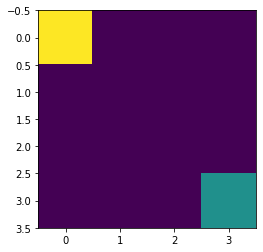

In [681]:
plt.imshow(grid)

In [682]:
class GridEnvironment(gym.Env):
    def __init__(self) -> None:
        super().__init__()
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 20
        self.environment_height = 10
        self.environment_width = 10
        self.reward = 0
        self.r_q = 0
        self.visit = np.array([False, False, False, False, False])


    def reset(self):
        self.timestep = 0
        self.agent_pos = [0,0]
        # self.r_q = 0
        position = self.agent_pos[0]*4+self.agent_pos[1]
        self.reward1_pos = [1,1]
        self.reward2_pos = [1,3]
        
        self.trap1_pos = [0,2]
        self.trap2_pos = [2,2]
        
        self.goal_pos = [3,3]
        
        self.state = np.zeros((4,4))
        # self.state[tuple(self.agent_pos)] = 1
        # self.state[tuple(self.goal_pos)] = 0.5
        
                        
        # self.state[tuple(self.reward1_pos)] = 0.3
        # self.state[tuple(self.reward2_pos)] = 0.3
        
        
        # self.state[tuple(self.trap1_pos)] = -0.8
        # self.state[tuple(self.trap2_pos)] = -0.8

        
        observation = self.state.flatten()
        
        return observation, position
        
    def step(self, action):      
        
        self.state = np.random.choice(self.observation_space.n)

        if action == 0:#right
          self.agent_pos[0] += 1
          if self.agent_pos[0] == 4:
            self.agent_pos[0] -= 1

        if action == 1:#left
          self.agent_pos[0] -= 1
          if self.agent_pos[0] == -1:
            self.agent_pos[0] += 1

        if action == 2:#up
          self.agent_pos[1] += 1
          if self.agent_pos[1] == 4:
            self.agent_pos[1] -= 1

        if action == 3:#down
          self.agent_pos[1] -= 1
          if self.agent_pos[1] == -1:
            self.agent_pos[1] += 1

        # states = np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15]])

        self.current_state = self.agent_pos[0]*4+self.agent_pos[1]

        self.agent_pos = np.clip(self.agent_pos,0,3)
        
        self.state = np.zeros((4,4))

        # self.state[tuple(self.agent_pos)] = 1
        # self.state[tuple(self.goal_pos)] = 0.5

        # self.state[tuple(self.reward1_pos)] = 0.3
        # self.state[tuple(self.reward2_pos)] = 0.3
        
        
        # self.state[tuple(self.trap1_pos)] = -0.8
        # self.state[tuple(self.trap2_pos)] = -0.8
        
        observation = self.state.flatten()
        
        #reward = np.array([2,1,-2,-1,3])
        
        if(self.agent_pos == self.reward1_pos).all():
            
            if self.visit[0] != True:
              self.reward = self.reward + 2
              self.r_q = 2
            self.visit[0] = True

        if(self.agent_pos == self.reward2_pos).all():

            if self.visit[1] != True:
              self.reward = self.reward + 1
              self.r_q = 1
            self.visit[1] = True

        if(self.agent_pos == self.trap1_pos).all():
            
            if self.visit[2] != True:
              self.reward = self.reward - 2
              self.r_q = -2
            self.visit[2] = True

        if(self.agent_pos == self.trap2_pos).all():
            
            if self.visit[3] != True:
              self.reward = self.reward - 1
              self.r_q = -1
            self.visit[3] = True

        if(self.agent_pos == self.goal_pos).all():
            
            if self.visit[4] != True:
              self.reward = self.reward + 3
              self.r_q = 3
            self.visit[4] = True

        self.timestep += 1
      
        done = True if self.current_state == 15 else False
        
        info = {}
        
        return observation, self.reward, done, info, self.r_q
        
    def render(self):
        # plt.imshow(self.state, cmap="Blues")
        # # ax = plt.gca()
        # # xticks = [0,1,2,3]
        # # yticks = [0,1,2,3]
        # # ax.xaxis.set_xticks(xticks)
        # # ax.xaxis.set_yticks(yticks)
        fig, ax = plt.subplots(figsize=(10,10))
        ax.set_xlim(0,4)
        ax.set_ylim(0,4)
        def plot_image(plot_pos):
            plot_jerry, plot_goal, plot_cheese1, plot_cheese2, plot_tom, plot_trap = False, False, False, False, False, False
            if np.array_equal(self.agent_pos, plot_pos):
                plot_jerry = True
            if np.array_equal(self.trap2_pos, plot_pos):
                plot_tom = True
            if np.array_equal(self.trap1_pos, plot_pos):
                plot_trap = True
            if np.array_equal(self.reward1_pos, plot_pos):
                plot_cheese1 = True
            if np.array_equal(self.reward2_pos, plot_pos):
                plot_cheese2 = True
            if np.array_equal(self.goal_pos, plot_pos):
                plot_goal = True


            if plot_jerry and all(not item for item in [plot_tom, plot_trap, plot_goal, plot_cheese1, plot_cheese2]):
                jerry = AnnotationBbox(OffsetImage(plt.imread('/content/gdrive/My Drive/Colab Notebooks/rl-images/jerry.jpg'),zoom=0.15),np.add(plot_pos,[0.5,0.5]),frameon=False)
                ax.add_artist(jerry)
            elif plot_cheese1 and all(not item for item in [plot_tom, plot_trap, plot_goal, plot_jerry, plot_cheese2]):
                s_cheese = AnnotationBbox(OffsetImage(plt.imread('/content/gdrive/My Drive/Colab Notebooks/rl-images/reward2.jpg'),zoom=0.1),np.add(plot_pos,[0.5,0.5]),frameon=False)
                ax.add_artist(s_cheese)
            elif plot_cheese2 and all(not item for item in [plot_tom, plot_trap, plot_goal, plot_jerry, plot_cheese1]):
                b_cheese = AnnotationBbox(OffsetImage(plt.imread('/content/gdrive/My Drive/Colab Notebooks/rl-images/reward2.jpg'),zoom=0.1),np.add(plot_pos,[0.5,0.5]),frameon=False)
                ax.add_artist(b_cheese)
            elif plot_tom and all(not item for item in [plot_cheese1, plot_trap, plot_goal, plot_jerry, plot_cheese2]):
                tom = AnnotationBbox(OffsetImage(plt.imread('/content/gdrive/My Drive/Colab Notebooks/rl-images/tom.jpg'),zoom=0.15),np.add(plot_pos,[0.5,0.5]),frameon=False)
                ax.add_artist(tom)
            elif plot_trap and all(not item for item in [plot_tom, plot_cheese1, plot_goal, plot_jerry, plot_cheese2]):
                trap = AnnotationBbox(OffsetImage(plt.imread('/content/gdrive/My Drive/Colab Notebooks/rl-images/tom.jpg'),zoom=0.15),np.add(plot_pos,[0.5,0.5]),frameon=False)
                ax.add_artist(trap)
            elif plot_goal and all(not item for item in [plot_tom, plot_trap, plot_cheese1, plot_jerry, plot_cheese2]):
                goal = AnnotationBbox(OffsetImage(plt.imread('/content/gdrive/My Drive/Colab Notebooks/rl-images/goal.jpg'),zoom=0.2),np.add(plot_pos,[0.5,0.5]),frameon=False)
                ax.add_artist(goal)
            #jerry to home
            elif all(item for item in [plot_goal, plot_jerry]) and all(not item for item in [plot_tom, plot_trap, plot_cheese1, plot_cheese2]):
                jerry_goal = AnnotationBbox(OffsetImage(plt.imread('/content/gdrive/My Drive/Colab Notebooks/rl-images/jgoal.jpg'),zoom=0.1),np.add(plot_pos,[0.5,0.5]),frameon=False)
                ax.add_artist(jerry_goal)
            #jerry to small cheese
            elif all(item for item in [plot_cheese1, plot_jerry]) and all(not item for item in [plot_tom, plot_trap, plot_goal, plot_cheese2]):
                jerry_s_cheese = AnnotationBbox(OffsetImage(plt.imread('/content/gdrive/My Drive/Colab Notebooks/rl-images/reward1.jpg'),zoom=0.1),np.add(plot_pos,[0.5,0.5]),frameon=False)
                ax.add_artist(jerry_s_cheese)
            #jerry to big cheese
            elif all(item for item in [plot_cheese2, plot_jerry]) and all(not item for item in [plot_tom, plot_trap, plot_goal, plot_cheese1]):
                jerry_b_cheese = AnnotationBbox(OffsetImage(plt.imread('/content/gdrive/My Drive/Colab Notebooks/rl-images/reward1.jpg'),zoom=0.1),np.add(plot_pos,[0.5,0.5]),frameon=False)
                ax.add_artist(jerry_b_cheese)
            #jerry to tom
            elif all(item for item in [plot_tom, plot_jerry]) and all(not item for item in [plot_goal, plot_trap, plot_cheese1, plot_cheese2]):
                jerry_tom = AnnotationBbox(OffsetImage(plt.imread('/content/gdrive/My Drive/Colab Notebooks/rl-images/tcaughtj.jpg'),zoom=0.3),np.add(plot_pos,[0.5,0.5]),frameon=False)
                ax.add_artist(jerry_tom)
            #jerry to trap
            elif all(item for item in [plot_trap, plot_jerry]) and all(not item for item in [plot_tom, plot_goal, plot_cheese1, plot_cheese2]):
                jerry_trap = AnnotationBbox(OffsetImage(plt.imread('/content/gdrive/My Drive/Colab Notebooks/rl-images/tcaughtj.jpg'),zoom=0.3),np.add(plot_pos,[0.5,0.5]),frameon=False)
                ax.add_artist(jerry_trap)
        coordinates_state_mapping_2 = {}
        for j in range(self.environment_height * self.environment_width):
            coordinates_state_mapping_2[j] = np.asarray([j % self.environment_width, int(np.floor(j / self.environment_width))])
        for position in coordinates_state_mapping_2:
            plot_image(coordinates_state_mapping_2[position])
        plt.xticks([0,1,2,3])
        plt.yticks([0,1,2,3])
        plt.grid()
        if plt:
            plt.show()
        else:
            fig.canvas.draw()
            img = np.array(fig.canvas.renderer.buffer_rgba())[:,:,:3]
            width = img.shape[1]
            height = img.shape[0]
            dim = (width,height)
            preprocessed_image = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)
            plt.show()
            return preprocessed_image

obs [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


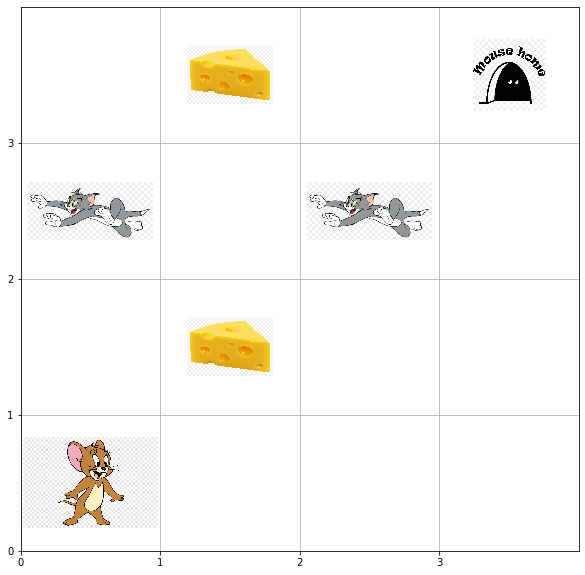

In [502]:
env = GridEnvironment()
obs, pos = env.reset()
print('obs' , obs)
env.render()
# print(obs)

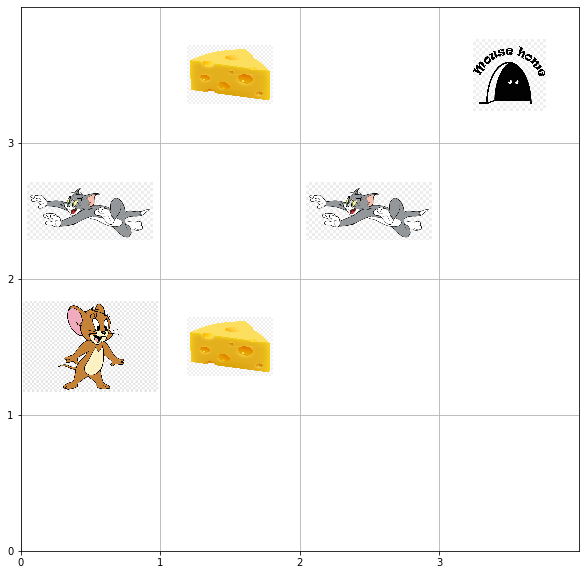

1
Reward:  0


In [503]:
action = 2
observation, reward, done, _, r_q= env.step(action)
env.render()
print(env.current_state)
print('Reward: ', reward)

In [504]:
class RandomAgent:
    def __init__(self, env):
        self.env = env
        self.observation_space = env.observation_space
        self.action_space = env.action_space
    
    def step(self, observation):
        return np.random.choice(self.action_space.n)

In [505]:
def position(action):
  if action == 0:
    return "Right"
  elif action == 1:
    return "Left"
  elif action == 2:
    return "Up"
  else:
    return "Down"

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Current State:  0 
 Chosen Action:  Left 
 Reward:  0
1


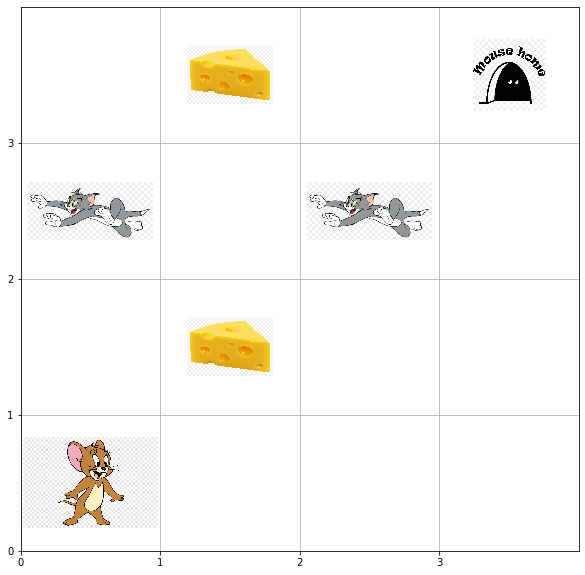

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Current State:  1 
 Chosen Action:  Up 
 Reward:  0
2


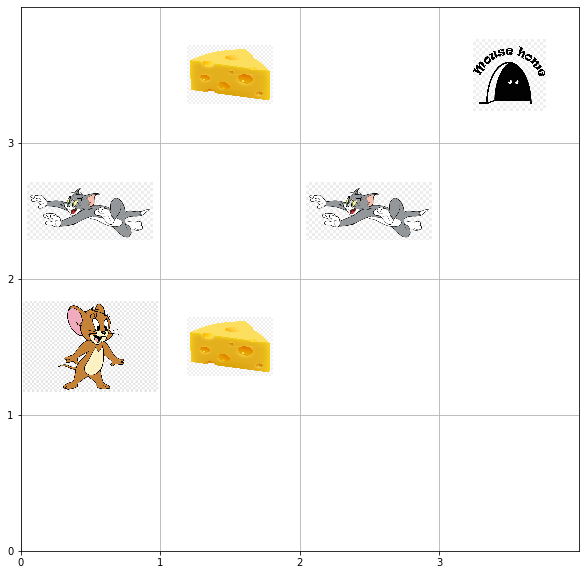

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Current State:  5 
 Chosen Action:  Right 
 Reward:  2
3


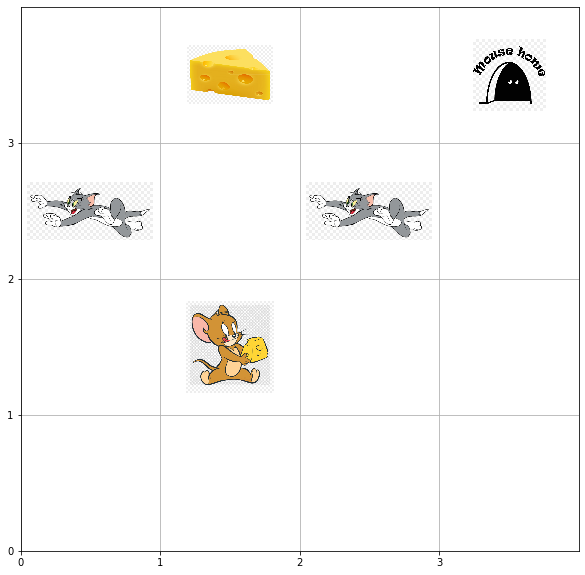

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Current State:  1 
 Chosen Action:  Left 
 Reward:  2
4


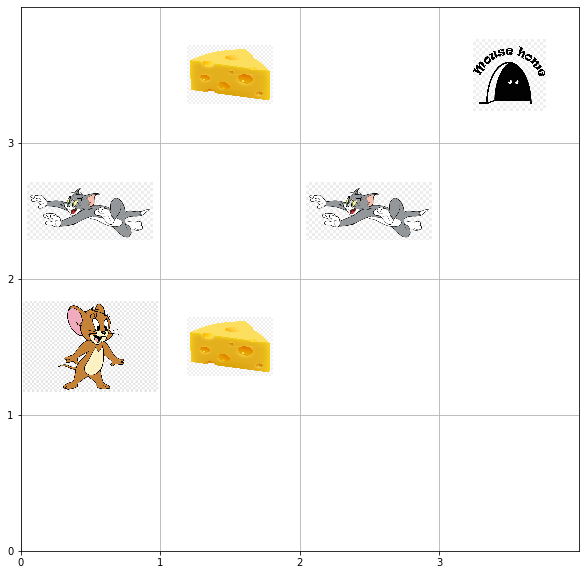

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Current State:  1 
 Chosen Action:  Left 
 Reward:  2
5


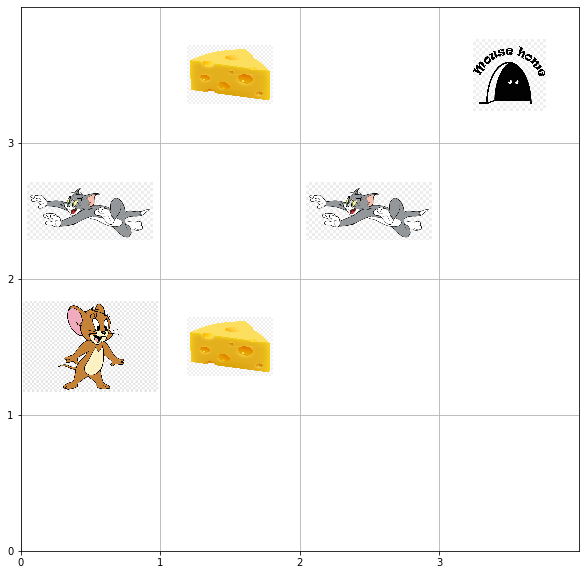

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Current State:  0 
 Chosen Action:  Down 
 Reward:  2
6


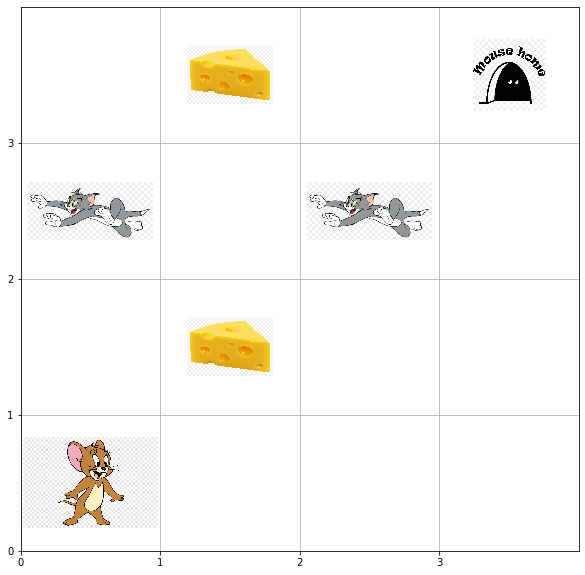

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Current State:  0 
 Chosen Action:  Left 
 Reward:  2
7


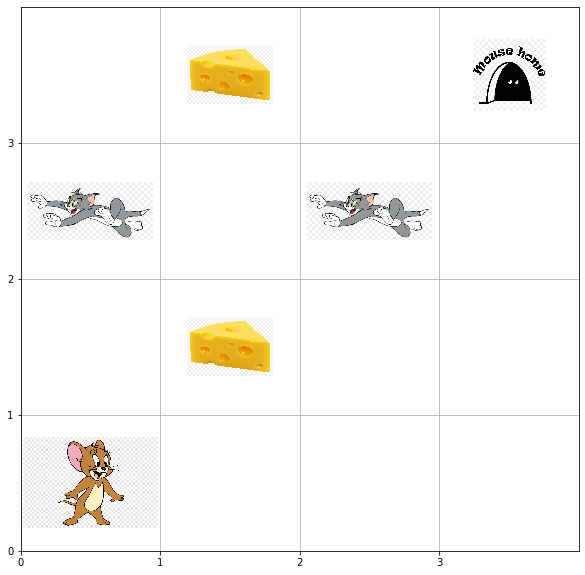

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Current State:  1 
 Chosen Action:  Up 
 Reward:  2
8


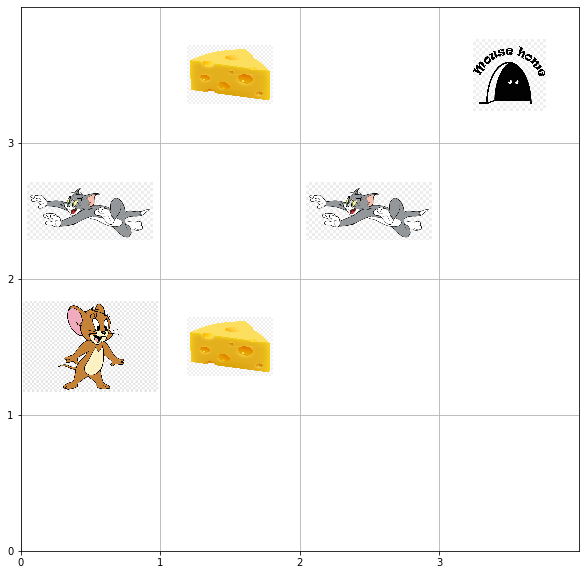

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Current State:  1 
 Chosen Action:  Left 
 Reward:  2
9


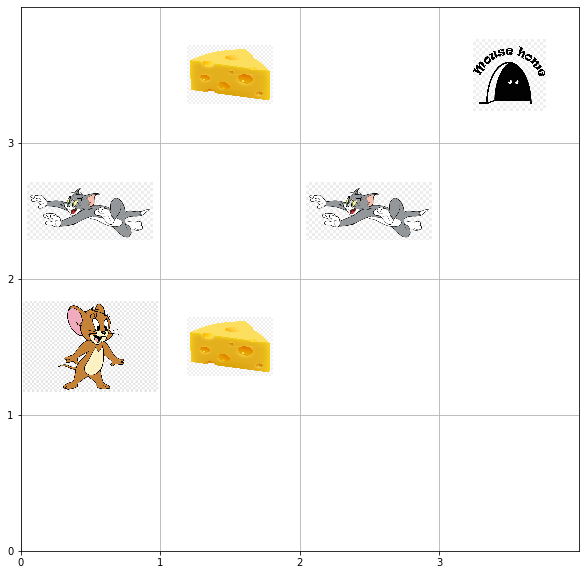

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Current State:  5 
 Chosen Action:  Right 
 Reward:  2
10


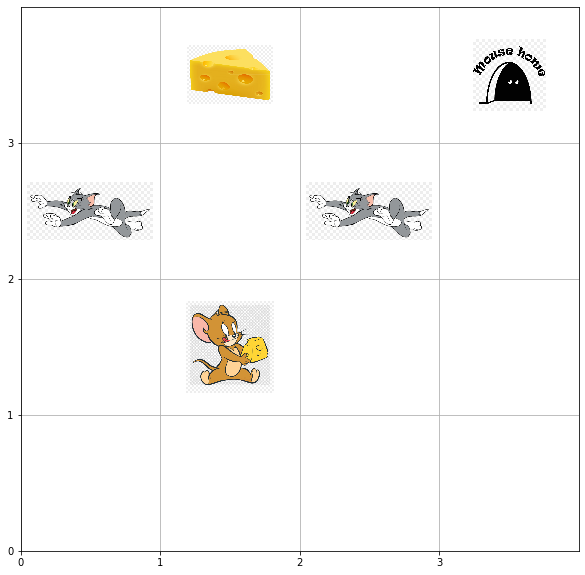

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

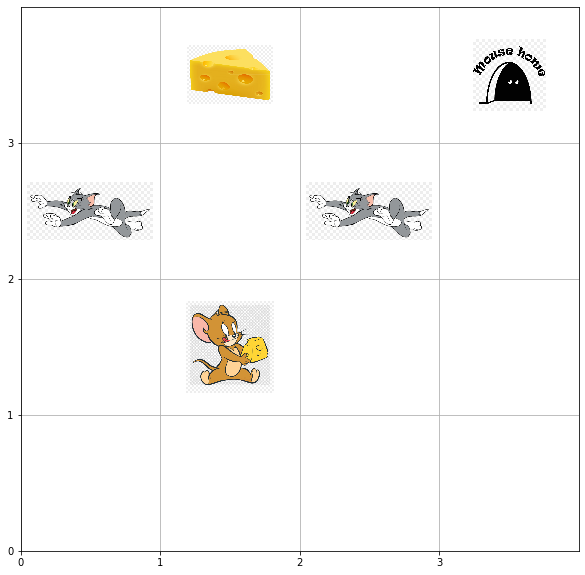

<IPython.core.display.Javascript object>

In [506]:
env = GridEnvironment()
agent = RandomAgent(env)
steps=1
obs = env.reset()
done = False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
      env.render()


while steps<=10:
    action = agent.step(obs)
    obs, reward, done, info, r_q = env.step(action)
    print(' Current State: ', env.current_state, '\n','Chosen Action: ', position(action),'\n','Reward: ', reward)
    print(steps)
    env.render()
    with output_grid.output_to(0, 0):
        output_grid.clear_cell()
        env.render()
    time.sleep(1)
    steps += 1

# Part II: Solve your environment using a tabular method – SARSA


In [760]:
epsilon = 0.9
ep_min = 0.01
ep_max = 1.0
eps_rate = 0.9
total_episodes = 100
max_timesteps = 10
learning_rate = 0.1
discount_factor = 0.7
# total_rewards = 5

# print(ep_decay)

In [761]:
epsilon_hist = []
t_reward = []

In [762]:
Q = np.zeros((env.observation_space.n, env.action_space.n))
print(Q)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [763]:
#Greedy method
def next_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])#greedy
    return action

In [764]:
def update_Q(state, state2, r_q, action, action2):
    next_Q = r_q + discount_factor * Q[state2, action2]
    Q[state, action] = Q[state, action] + learning_rate * (next_Q - Q[state,action])

In [765]:
for episode in range(total_episodes):
  t_steps = 0
  total_reward = 0
  obs, position = env.reset()
  state1 = position
  # print('state1=', state1)
  action1 = next_action(state1)

  # epsilon = ep_min + (ep_max - ep_min) * np.exp(-eps_rate * episode)
 
  while t_steps < env.max_timesteps:
    # env.render()

    obs, reward, done, info, r_q = env.step(action1)

    state2 = env.current_state
    # print('state2=', state2)
    action2 = next_action(state2)

    update_Q(state1, state2, r_q, action1, action2)
    state1 = state2
    action1 = action2
    t_steps += 1
    # print(r_q)
    total_reward += r_q

    if done:
      break
  
  epsilon = ep_min + (ep_max - ep_min) * np.exp (-eps_rate * episode)
    
  epsilon_hist.append(epsilon)
  t_reward.append(total_reward)
  # total_reward = 0  

In [723]:
print(Q)

[[2.45086717 6.90325125 1.76986111 9.62685323]
 [0.         5.175083   0.57       0.3       ]
 [0.3        0.         0.3        0.3       ]
 [0.3        0.3        0.         0.3       ]
 [2.15723292 0.4766374  0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.9434457  0.         0.         0.        ]
 [0.62838    0.3        0.591      0.6141189 ]
 [0.         0.         2.13446896 0.        ]
 [0.3        0.         1.67326874 0.        ]
 [0.         0.32247    1.61087476 0.        ]
 [0.3        1.52157054 0.         0.3       ]
 [0.         0.         0.         0.        ]
 [0.3        0.321      0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]


Text(0, 0.5, 'Epsilon')

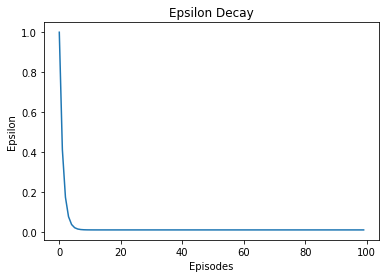

In [724]:
# print(epsilon_hist)
plt.plot(epsilon_hist)
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Epsilon')

Text(0, 0.5, 'Reward')

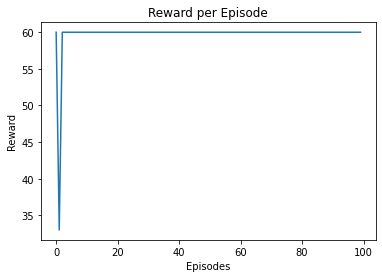

In [725]:
# print(t_reward)
plt.plot(t_reward)
plt.title('Reward per Episode')
plt.xlabel('Episodes')
plt.ylabel('Reward')

Agent chooses only greedy actions from the learnt policy.

In [766]:
# epsilon = 0.9
ep_min = 0.01
ep_max = 1.0
eps_rate = 0.9
total_episodes = 50
max_timesteps = 10
learning_rate = 0.1
discount_factor = 0.7
# total_rewards = 5

# print(ep_decay)

In [767]:
epsilon_hist1 = []
t_reward1 = []

In [768]:
#Only Greedy method
def next_action1(state):
  action = np.argmax(Q[state])#greedy
  # print(action)
  return action

In [769]:
for episode in range(total_episodes):
  t_steps = 0
  total_reward = 0
  obs, position = env.reset()
  state1 = position
  # print('state1=', state1)
  action1 = next_action1(state1)
  # ep = 1+np.log(ep_min)/total_episodes
  # eps_rate *= ep
  # eps_rate = max(ep_min, eps_rate)
 
  while t_steps < env.max_timesteps:
    # env.render()
    # r_q = 0

    obs, reward, done, info, r_q = env.step(action1)

    state2 = env.current_state
    # print('state2=', state2)
    action2 = next_action(state2)

    update_Q(state1, state2, r_q, action1, action2)
    state1 = state2
    action1 = action2
    t_steps += 1
    # print(r_q)
    total_reward += r_q

    if done:
      break
  
  epsilon = ep_min + (ep_max - ep_min) * np.exp (-eps_rate * episode)
    
  epsilon_hist1.append(epsilon)
  t_reward1.append(total_reward)
  # total_reward = 0  

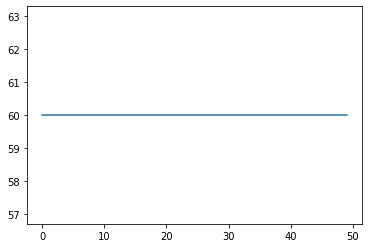

In [770]:
plt.plot(t_reward1)

Use hyperparameter tuning on at least two parameters to get better results.
Parameters to tune:

Parameter 1:

In [744]:
# Number of episodes = 10000 & max timesteps = 100
# epsilon = 0.9
ep_min = 0.01
ep_max = 1.0
eps_rate = 0.9
total_episodes = 10000
max_timesteps = 100
learning_rate = 0.1
discount_factor = 0.7
# total_rewards = 5

# print(ep_decay)
epsilon_hist = []
t_reward = []

In [745]:
Q = np.zeros((env.observation_space.n, env.action_space.n))
print(Q)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [746]:
#Greedy method
def next_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])#greedy
    return action

def update_Q(state, state2, r_q, action, action2):
    next_Q = r_q + discount_factor * Q[state2, action2]
    Q[state, action] = Q[state, action] + learning_rate * (next_Q - Q[state,action])

for episode in range(total_episodes):
  t_steps = 0
  total_reward = 0
  obs, position = env.reset()
  state1 = position
  # print('state1=', state1)
  action1 = next_action(state1)

  # epsilon = ep_min + (ep_max - ep_min) * np.exp(-eps_rate * episode)
 
  while t_steps < env.max_timesteps:
    # env.render()
    # r_q = 0

    obs, reward, done, info, r_q = env.step(action1)

    state2 = env.current_state
    # print('state2=', state2)
    action2 = next_action(state2)

    update_Q(state1, state2, r_q, action1, action2)
    state1 = state2
    action1 = action2
    t_steps += 1
    # print(r_q)
    total_reward += r_q

    if done:
      break
  
  epsilon = ep_min + (ep_max - ep_min) * np.exp (-eps_rate * episode)
    
  epsilon_hist.append(epsilon)
  t_reward.append(total_reward)
  # total_reward = 0
    
print(Q)

[[8.72433617 7.68107686 9.99370011 9.26524611]
 [9.9986076  9.21204857 9.38951587 8.98635463]
 [9.97411755 1.28591688 0.         0.        ]
 [9.99600817 2.70926603 0.         2.68047935]
 [9.336656   0.3        0.99711025 0.        ]
 [8.8026854  9.37777507 9.99798843 8.22020001]
 [8.9598694  8.62079433 9.99755358 9.39648373]
 [9.76088162 9.53888343 9.99985971 9.90001848]
 [9.89998832 1.20253721 0.         0.        ]
 [0.         0.         9.38884954 0.        ]
 [9.75406599 0.3        0.         0.        ]
 [2.73411186 9.99718161 9.37652269 7.78246198]
 [9.66444986 4.48939215 2.92996693 5.41131456]
 [0.         0.         0.         9.78895178]
 [0.321      0.93376384 0.813      9.82126573]
 [0.         0.         0.         0.        ]]


Text(0, 0.5, 'Reward')

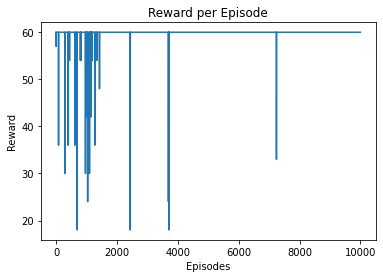

In [747]:
plt.plot(t_reward)
plt.title('Reward per Episode')
plt.xlabel('Episodes')
plt.ylabel('Reward')

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0.90729    0.         9.53533275 0.        ]
 [0.3        0.87659262 9.59989207 0.321     ]
 [1.13626182 9.58253346 1.0960419  2.81998646]
 [0.63027    0.         0.         0.        ]
 [1.11030452 0.         0.3        0.        ]
 [0.321      0.321      0.         0.5889    ]
 [0.         2.04390302 0.3        0.        ]
 [0.8718     0.         0.         0.        ]
 [1.51912352 0.         0.3        0.        ]
 [0.         0.59247    0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.813      0.         0.         0.        ]
 [7.88476586 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]


Text(0, 0.5, 'Reward')

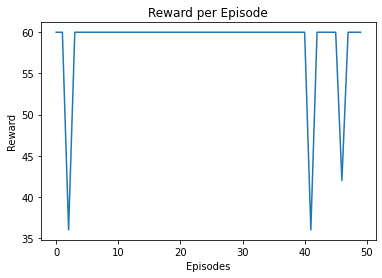

In [755]:
# Number of episodes = 50 & max timesteps = 5
# epsilon = 0.9
ep_min = 0.01
ep_max = 1.0
eps_rate = 0.9
total_episodes = 50
max_timesteps = 5
learning_rate = 0.1
discount_factor = 0.7
# total_rewards = 5

# print(ep_decay)
epsilon_hist = []
t_reward = []

Q = np.zeros((env.observation_space.n, env.action_space.n))
print(Q)

#Greedy method
def next_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])#greedy
    return action

def update_Q(state, state2, r_q, action, action2):
    next_Q = r_q + discount_factor * Q[state2, action2]
    Q[state, action] = Q[state, action] + learning_rate * (next_Q - Q[state,action])

for episode in range(total_episodes):
  t_steps = 0
  total_reward = 0
  obs, position = env.reset()
  state1 = position
  # print('state1=', state1)
  action1 = next_action(state1)

  # epsilon = ep_min + (ep_max - ep_min) * np.exp(-eps_rate * episode)
 
  while t_steps < env.max_timesteps:
    # env.render()
    # r_q = 0

    obs, reward, done, info, r_q = env.step(action1)

    state2 = env.current_state
    # print('state2=', state2)
    action2 = next_action(state2)

    update_Q(state1, state2, r_q, action1, action2)
    state1 = state2
    action1 = action2
    t_steps += 1
    # print(r_q)
    total_reward += r_q

    if done:
      break
  
  epsilon = ep_min + (ep_max - ep_min) * np.exp (-eps_rate * episode)
    
  epsilon_hist.append(epsilon)
  t_reward.append(total_reward)
  # total_reward = 0
    
print(Q)

plt.plot(t_reward)
plt.title('Reward per Episode')
plt.xlabel('Episodes')
plt.ylabel('Reward')

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[9.91729251 9.88041202 8.81828766 9.99949829]
 [8.31652793 0.         0.         0.        ]
 [0.75644614 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [9.76301327 9.99292229 8.24418649 9.89935289]
 [0.         0.         7.59814486 0.        ]
 [6.56979788 0.3        0.         1.25455645]
 [0.         0.         0.         0.        ]
 [9.70454748 0.         0.3        0.        ]
 [0.3        0.         0.         0.        ]
 [5.09998549 0.73259788 0.         0.        ]
 [0.         0.         0.         0.        ]
 [9.85782112 1.23306018 0.91021836 1.80569108]
 [0.3        0.         0.         4.80131097]
 [0.321      0.61505944 3.         1.68689066]
 [0.         0.         0.         0.        ]]


Text(0, 0.5, 'Reward')

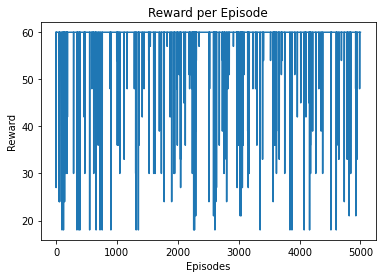

In [739]:
# Number of episodes = 5000 & max timesteps = 5
# epsilon = 0.9
ep_min = 0.01
ep_max = 1.0
eps_rate = 0.9
total_episodes = 5000
max_timesteps = 5
learning_rate = 0.1
discount_factor = 0.7
# total_rewards = 5

# print(ep_decay)
epsilon_hist = []
t_reward = []

Q = np.zeros((env.observation_space.n, env.action_space.n))
print(Q)

#Greedy method
def next_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])#greedy
    return action

def update_Q(state, state2, r_q, action, action2):
    next_Q = r_q + discount_factor * Q[state2, action2]
    Q[state, action] = Q[state, action] + learning_rate * (next_Q - Q[state,action])

for episode in range(total_episodes):
  t_steps = 0
  total_reward = 0
  obs, position = env.reset()
  state1 = position
  # print('state1=', state1)
  action1 = next_action(state1)

  # epsilon = ep_min + (ep_max - ep_min) * np.exp(-eps_rate * episode)
 
  while t_steps < env.max_timesteps:
    # env.render()
    # r_q = 0

    obs, reward, done, info, r_q = env.step(action1)

    state2 = env.current_state
    # print('state2=', state2)
    action2 = next_action(state2)

    update_Q(state1, state2, r_q, action1, action2)
    state1 = state2
    action1 = action2
    t_steps += 1
    # print(r_q)
    total_reward += r_q

    if done:
      break
  
  epsilon = ep_min + (ep_max - ep_min) * np.exp (-eps_rate * episode)
    
  epsilon_hist.append(epsilon)
  t_reward.append(total_reward)
  # total_reward = 0
    
print(Q)

plt.plot(t_reward)
plt.title('Reward per Episode')
plt.xlabel('Episodes')
plt.ylabel('Reward')

Parameter 2:

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[9.93887106 1.55256079 0.40468918 1.335768  ]
 [0.         0.         0.03       1.05379248]
 [0.03       0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [9.94614736 6.9078462  4.20163414 7.24295564]
 [0.03       0.         0.         6.53267439]
 [0.03       0.         0.         0.        ]
 [0.03       0.         0.         0.        ]
 [6.35144781 9.96224761 2.91413312 6.55774565]
 [3.47700581 0.         0.         0.        ]
 [0.03       0.         0.03       0.        ]
 [0.         0.03       0.         0.03      ]
 [9.76469486 0.0601179  0.12061731 0.59605994]
 [0.         0.         0.         5.40484318]
 [0.0597     0.         0.03       0.        ]
 [0.         0.         0.         0.        ]]


Text(0, 0.5, 'Reward')

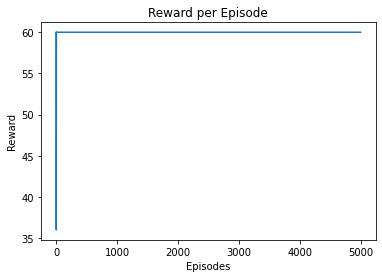

In [756]:
#learning rate = 0.01
# epsilon = 0.9
ep_min = 0.01
ep_max = 1.0
eps_rate = 0.9
total_episodes = 5000
max_timesteps = 5
learning_rate = 0.01
discount_factor = 0.7
# total_rewards = 5

# print(ep_decay)
epsilon_hist = []
t_reward = []

Q = np.zeros((env.observation_space.n, env.action_space.n))
print(Q)

#Greedy method
def next_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])#greedy
    return action

def update_Q(state, state2, r_q, action, action2):
    next_Q = r_q + discount_factor * Q[state2, action2]
    Q[state, action] = Q[state, action] + learning_rate * (next_Q - Q[state,action])

for episode in range(total_episodes):
  t_steps = 0
  total_reward = 0
  obs, position = env.reset()
  state1 = position
  # print('state1=', state1)
  action1 = next_action(state1)

  # epsilon = ep_min + (ep_max - ep_min) * np.exp(-eps_rate * episode)
 
  while t_steps < env.max_timesteps:
    # env.render()
    # r_q = 0

    obs, reward, done, info, r_q = env.step(action1)

    state2 = env.current_state
    # print('state2=', state2)
    action2 = next_action(state2)

    update_Q(state1, state2, r_q, action1, action2)
    state1 = state2
    action1 = action2
    t_steps += 1
    # print(r_q)
    total_reward += r_q

    if done:
      break
  
  epsilon = ep_min + (ep_max - ep_min) * np.exp (-eps_rate * episode)
    
  epsilon_hist.append(epsilon)
  t_reward.append(total_reward)
  # total_reward = 0
    
print(Q)

plt.plot(t_reward)
plt.title('Reward per Episode')
plt.xlabel('Episodes')
plt.ylabel('Reward')

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[7.57216860e+00 7.55305039e-02 4.31071261e-02 7.58793042e-02]
 [0.00000000e+00 0.00000000e+00 4.27944184e-02 0.00000000e+00]
 [4.04206461e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.59384936e-02 7.56797130e+00 3.42285795e-02 7.34210888e-02]
 [0.00000000e+00 0.00000000e+00 3.00797433e-04 6.44862931e-02]
 [4.06891983e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.67817359e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.50390858e-02 3.02681125e-04 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3

Text(0, 0.5, 'Reward')

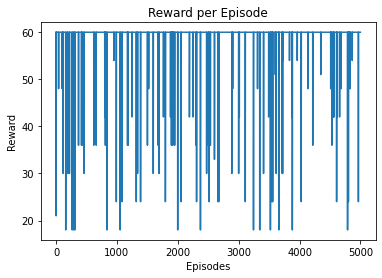

In [757]:
#learning rate = 0.0001
# epsilon = 0.9
ep_min = 0.01
ep_max = 1.0
eps_rate = 0.9
total_episodes = 5000
max_timesteps = 5
learning_rate = 0.0001
discount_factor = 0.7
# total_rewards = 5

# print(ep_decay)
epsilon_hist = []
t_reward = []

Q = np.zeros((env.observation_space.n, env.action_space.n))
print(Q)

#Greedy method
def next_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])#greedy
    return action

def update_Q(state, state2, r_q, action, action2):
    next_Q = r_q + discount_factor * Q[state2, action2]
    Q[state, action] = Q[state, action] + learning_rate * (next_Q - Q[state,action])

for episode in range(total_episodes):
  t_steps = 0
  total_reward = 0
  obs, position = env.reset()
  state1 = position
  # print('state1=', state1)
  action1 = next_action(state1)

  # epsilon = ep_min + (ep_max - ep_min) * np.exp(-eps_rate * episode)
 
  while t_steps < env.max_timesteps:
    # env.render()
    # r_q = 0

    obs, reward, done, info, r_q = env.step(action1)

    state2 = env.current_state
    # print('state2=', state2)
    action2 = next_action(state2)

    update_Q(state1, state2, r_q, action1, action2)
    state1 = state2
    action1 = action2
    t_steps += 1
    # print(r_q)
    total_reward += r_q

    if done:
      break
  
  epsilon = ep_min + (ep_max - ep_min) * np.exp (-eps_rate * episode)
    
  epsilon_hist.append(epsilon)
  t_reward.append(total_reward)
  # total_reward = 0
    
print(Q)

plt.plot(t_reward)
plt.title('Reward per Episode')
plt.xlabel('Episodes')
plt.ylabel('Reward')

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 9.99962447 10.          9.99823929  9.99959928]
 [ 9.88675934  9.92071868  8.13867615  9.99896265]
 [ 7.48727547  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 9.84809729  9.99971592  9.33200674  9.76976835]
 [ 2.25        7.48319572  5.04708758  9.9191426 ]
 [ 6.55547083  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 9.51282921  3.775       2.20875     2.025     ]
 [ 4.25469315  0.          0.          0.        ]
 [ 5.09992454  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 8.95841956  8.20920069  5.9124646   0.        ]
 [ 0.          0.          5.03884635  0.        ]
 [ 0.          0.          2.99999964  0.    

Text(0, 0.5, 'Reward')

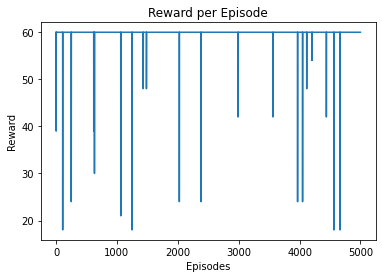

In [758]:
#learning rate = 0.5
# epsilon = 0.9
ep_min = 0.01
ep_max = 1.0
eps_rate = 0.9
total_episodes = 5000
max_timesteps = 5
learning_rate = 0.5
discount_factor = 0.7
# total_rewards = 5

# print(ep_decay)
epsilon_hist = []
t_reward = []

Q = np.zeros((env.observation_space.n, env.action_space.n))
print(Q)

#Greedy method
def next_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])#greedy
    return action

def update_Q(state, state2, r_q, action, action2):
    next_Q = r_q + discount_factor * Q[state2, action2]
    Q[state, action] = Q[state, action] + learning_rate * (next_Q - Q[state,action])

for episode in range(total_episodes):
  t_steps = 0
  total_reward = 0
  obs, position = env.reset()
  state1 = position
  # print('state1=', state1)
  action1 = next_action(state1)

  # epsilon = ep_min + (ep_max - ep_min) * np.exp(-eps_rate * episode)
 
  while t_steps < env.max_timesteps:
    # env.render()
    # r_q = 0

    obs, reward, done, info, r_q = env.step(action1)

    state2 = env.current_state
    # print('state2=', state2)
    action2 = next_action(state2)

    update_Q(state1, state2, r_q, action1, action2)
    state1 = state2
    action1 = action2
    t_steps += 1
    # print(r_q)
    total_reward += r_q

    if done:
      break
  
  epsilon = ep_min + (ep_max - ep_min) * np.exp (-eps_rate * episode)
    
  epsilon_hist.append(epsilon)
  t_reward.append(total_reward)
  # total_reward = 0
    
print(Q)

plt.plot(t_reward)
plt.title('Reward per Episode')
plt.xlabel('Episodes')
plt.ylabel('Reward')

References:
https://medium.com/swlh/introduction-to-reinforcement-learning-coding-sarsa-part-4-2d64d6e37617
https://www.w3schools.com/python/numpy/default.asp
https://www.w3schools.com/python/matplotlib_intro.asp